In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm

import PLred.fit as fit
from PLred.imgrecon import locs2image

In [25]:
model_file = '../example_model_couplingmap/betcmi_20240917_polymodel.fits'
image_ngrid = 32
image_fov = 20 # mas
n_trim = 3

fitter = fit.PLMapFit(model_file, image_ngrid, image_fov, n_trim)

loading model
No data loaded. load either mapdata or model


In [54]:
ini_temp = 1e3 #1
tau = 3e4
gamma = 5064 # 5000
n_element = 100 #50
target_chi2 = 1e-4
fitter.store_hyperparams(ini_temp, tau, gamma, n_element, target_chi2)

In [73]:
specind = 110
fibinds = np.arange(25,30) #np.arange(38)

fitter.prepare_data(specind, fibinds)

In [74]:
np.shape(fitter.mat)

(1024, 405)

1024it [00:03, 321.57it/s]
100%|██████████| 2000/2000 [00:07<00:00, 253.66it/s]


Done


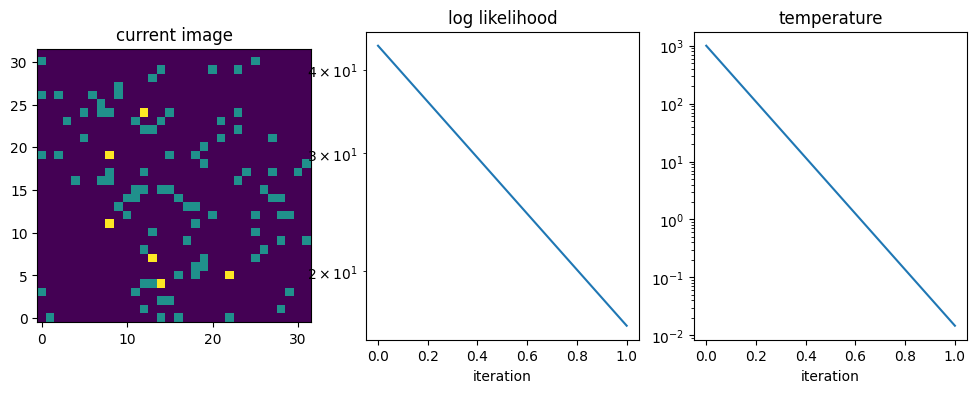

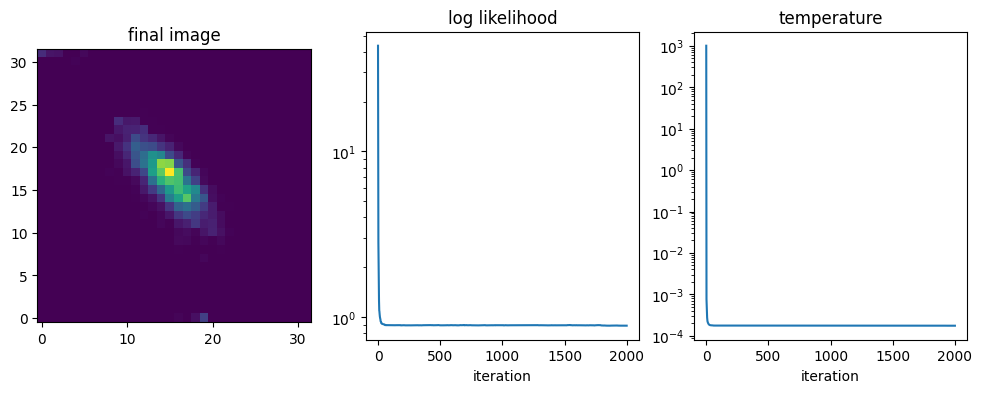

In [75]:
fitter.make_matrix(specind, fibinds)

rc = fitter.run(niter = 2000, radius = 10, plot_every = 5000)

Text(12.924809625449729, 19.785836503510563, 'disk')

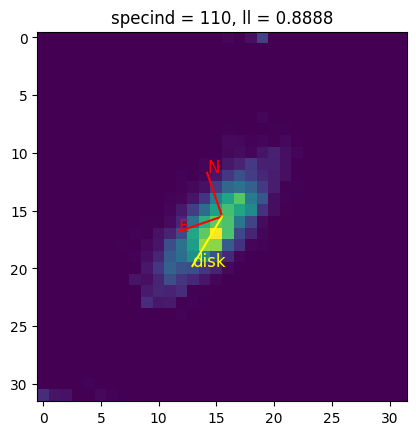

In [77]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 130
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


Text(13.152642186070546, 19.914737964294634, 'disk')

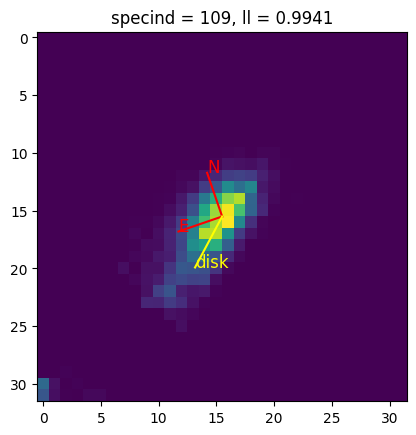

In [68]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 133
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


Text(13.152642186070546, 19.914737964294634, 'disk')

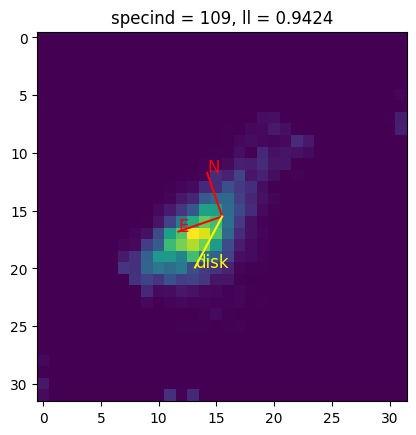

In [65]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 133
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


Text(13.152642186070546, 19.914737964294634, 'disk')

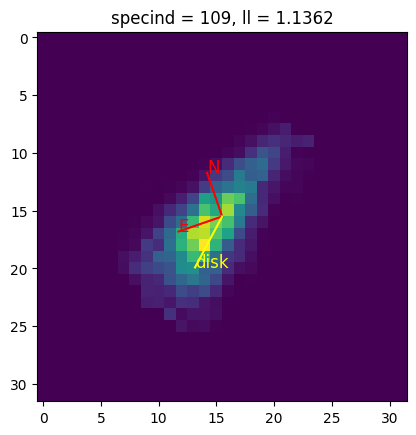

In [53]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 133
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


Text(13.0, 19.83012701892219, 'disk')

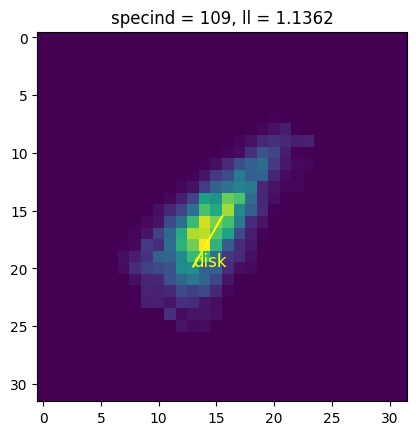

In [51]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 131
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


# disk_PA = 143
# pad = 71
# xc, yc = 15.5, 15.5
# dx_disk = -5*np.cos(np.radians(pad - disk_PA))
# dy_disk = -5*np.sin(np.radians(pad - disk_PA))

# plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
# plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


1024it [00:23, 43.02it/s]
100%|██████████| 2000/2000 [00:13<00:00, 152.47it/s]


Done


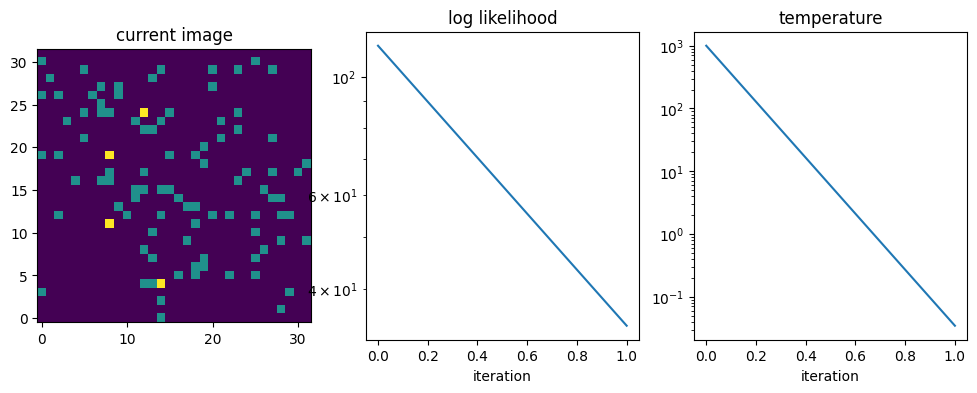

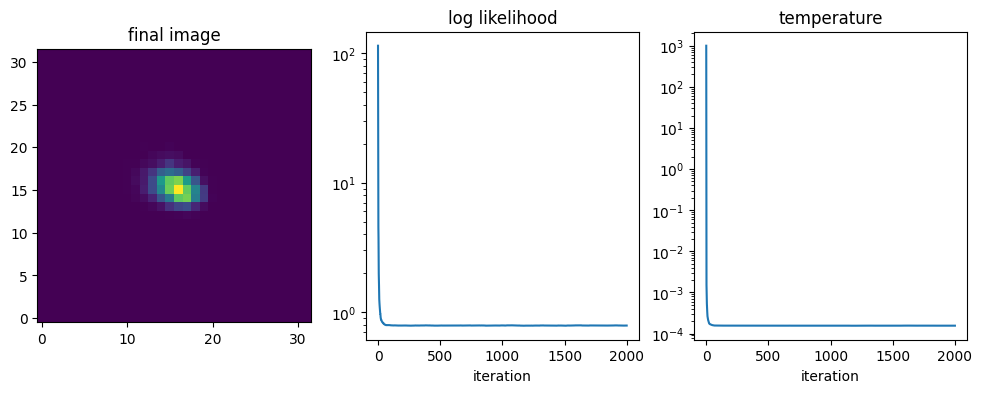

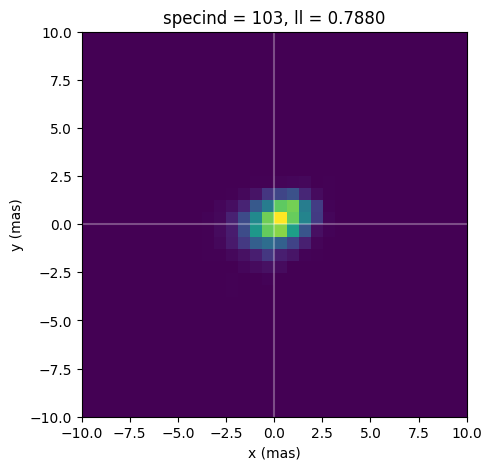

1024it [00:23, 42.96it/s]
100%|██████████| 2000/2000 [00:13<00:00, 151.99it/s]


Done


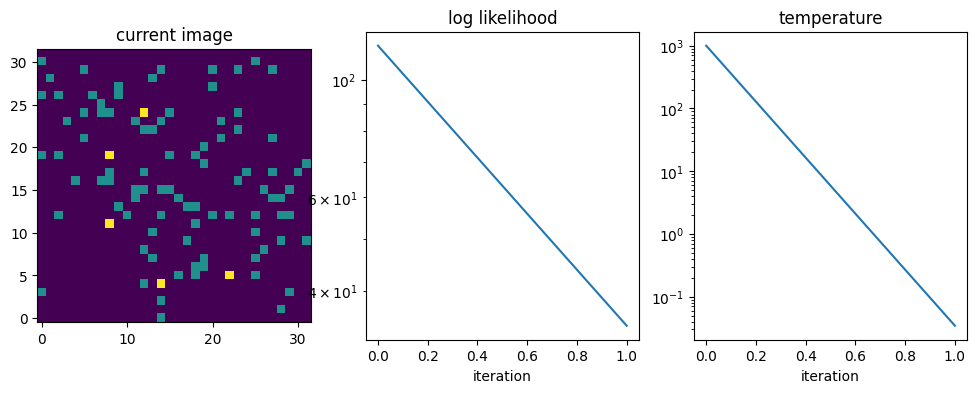

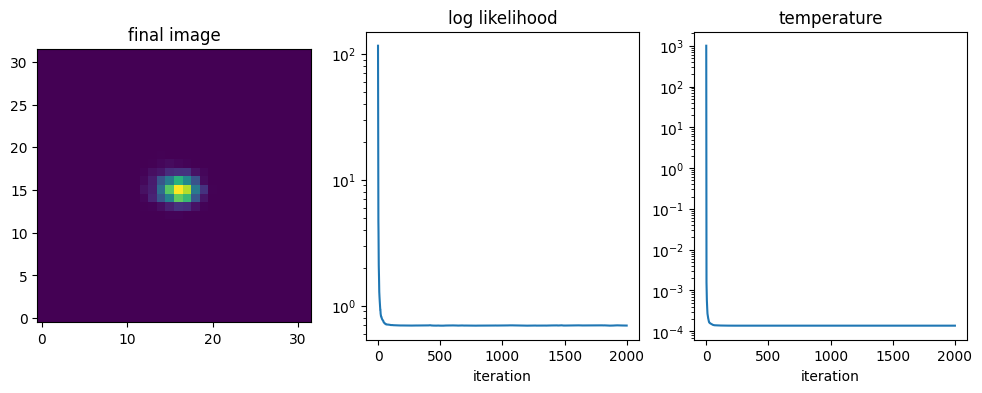

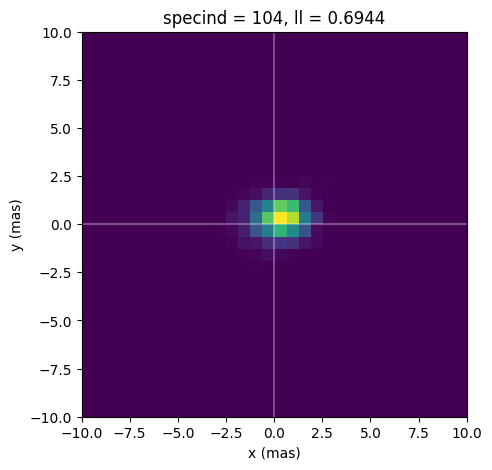

1024it [00:23, 42.88it/s]
100%|██████████| 2000/2000 [00:13<00:00, 150.47it/s]


Done


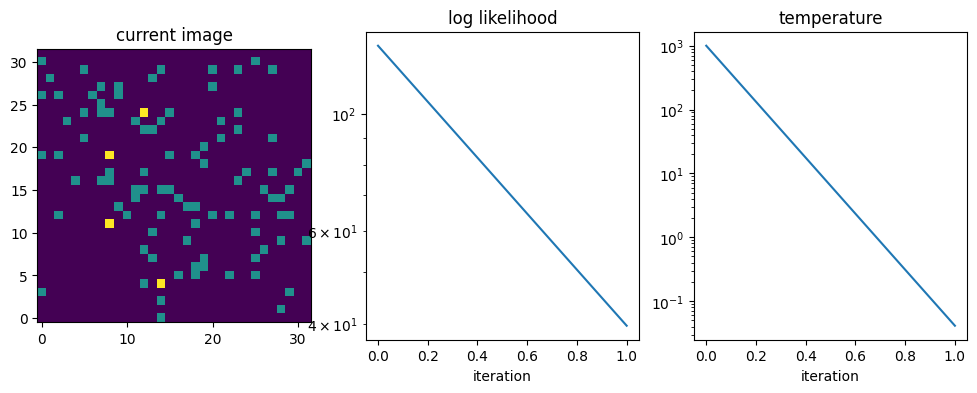

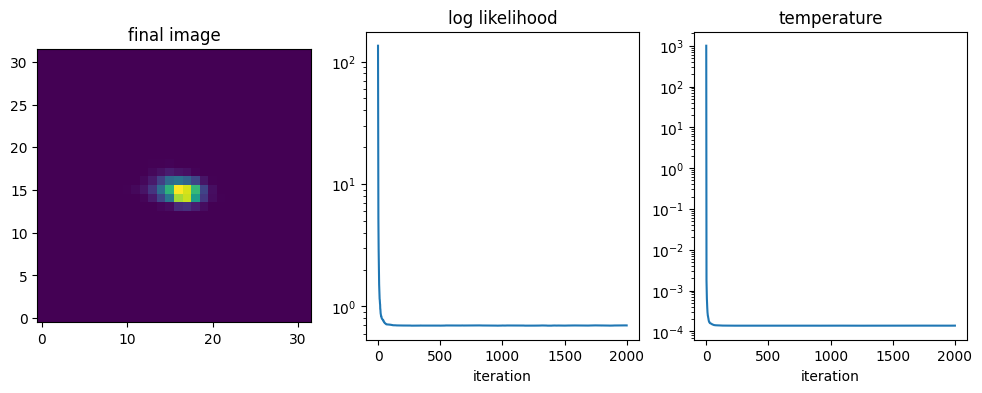

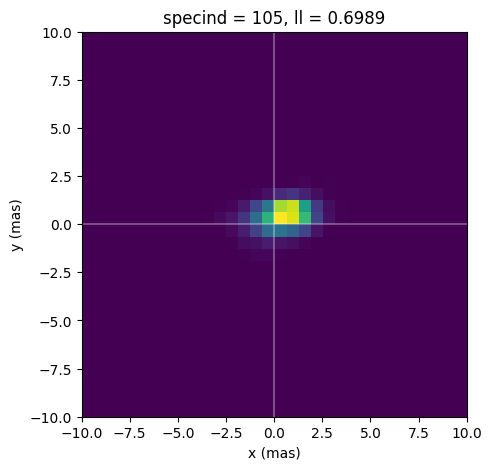

1024it [00:23, 42.98it/s]
100%|██████████| 2000/2000 [00:13<00:00, 151.32it/s]


Done


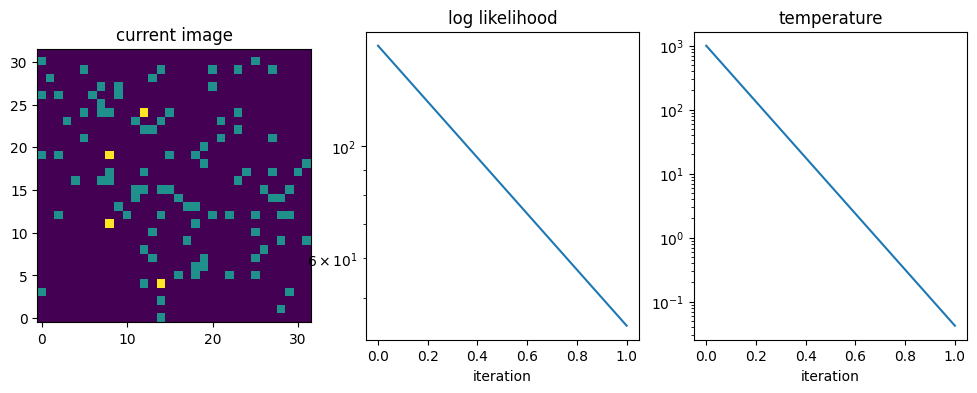

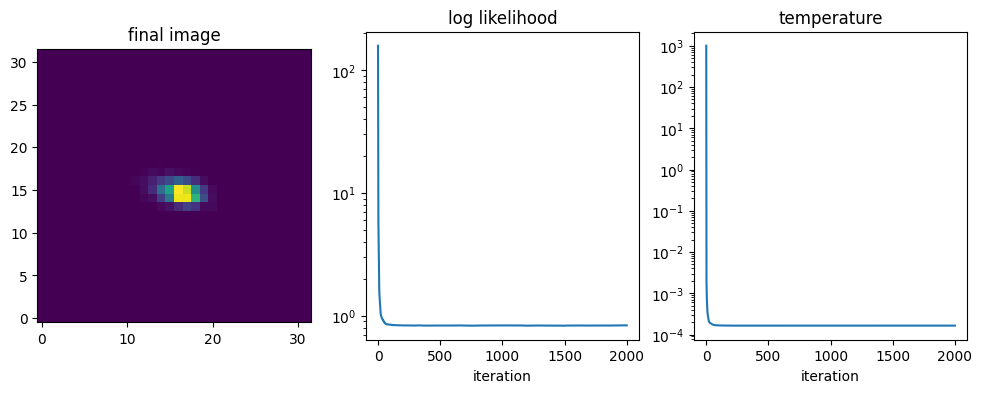

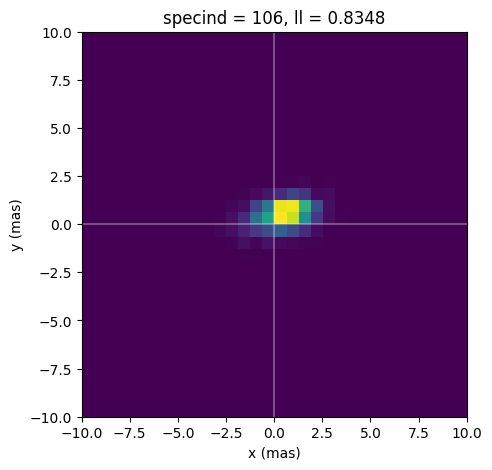

1024it [00:23, 43.22it/s]
100%|██████████| 2000/2000 [00:13<00:00, 150.88it/s]


Done


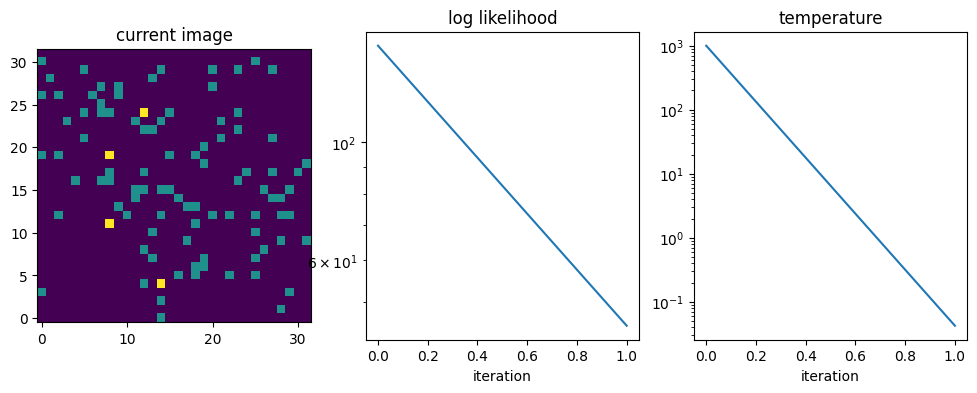

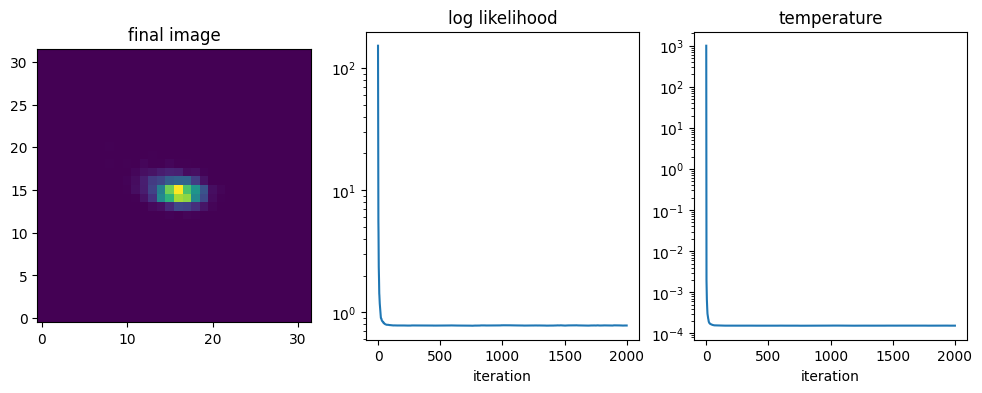

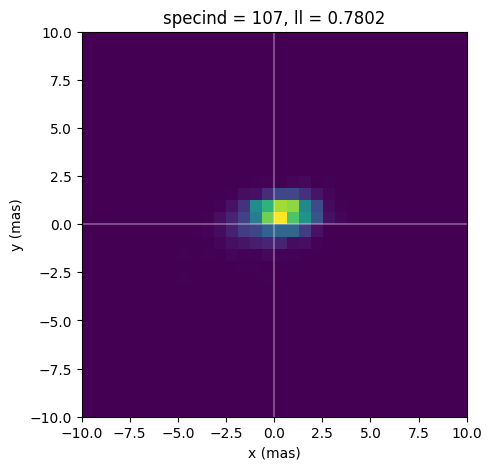

1024it [00:23, 43.06it/s]
100%|██████████| 2000/2000 [00:13<00:00, 149.93it/s]


Done


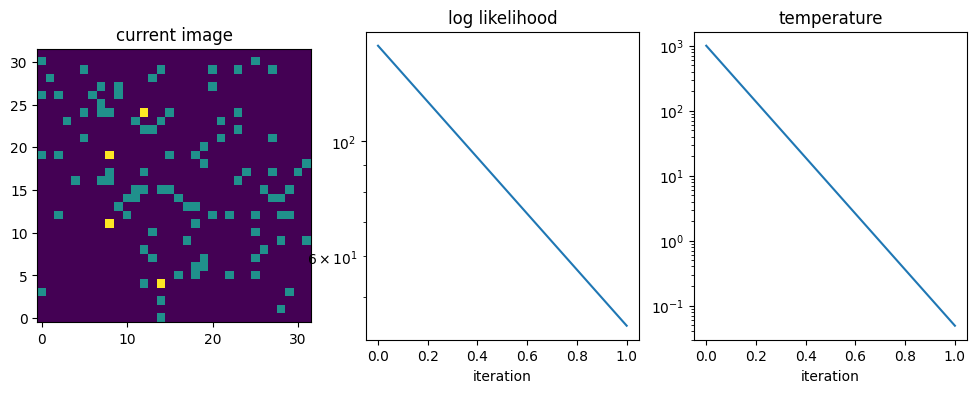

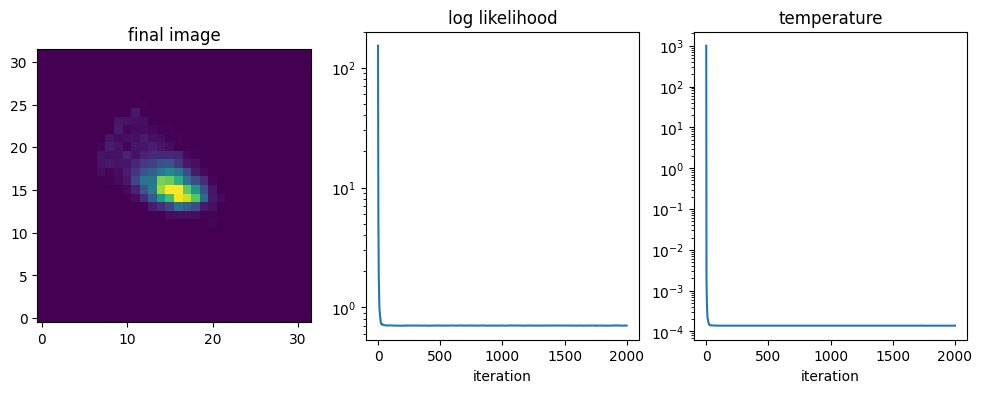

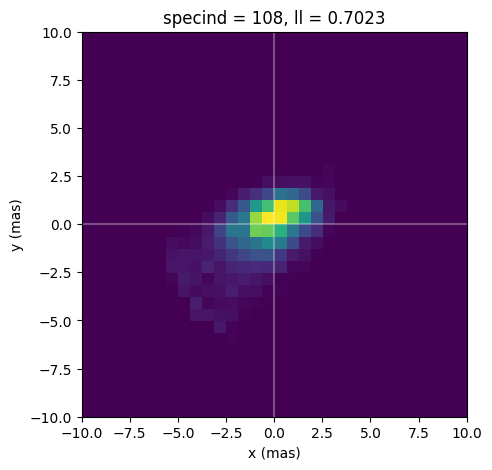

1024it [00:23, 43.17it/s]
100%|██████████| 2000/2000 [00:13<00:00, 150.63it/s]


Done


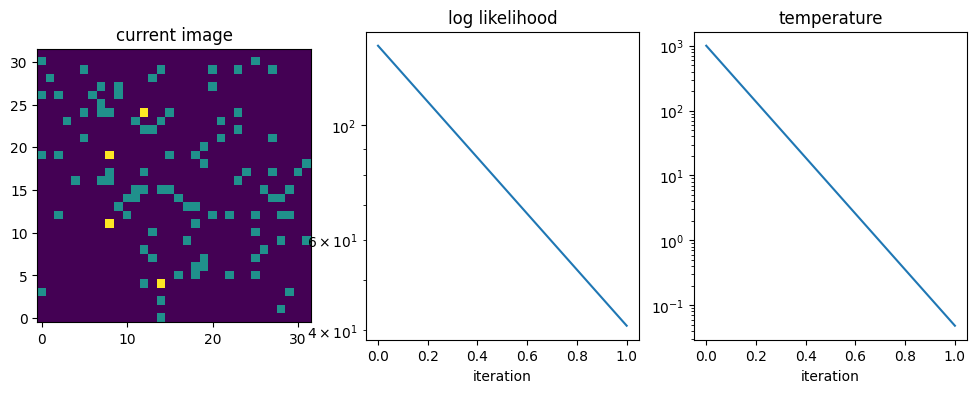

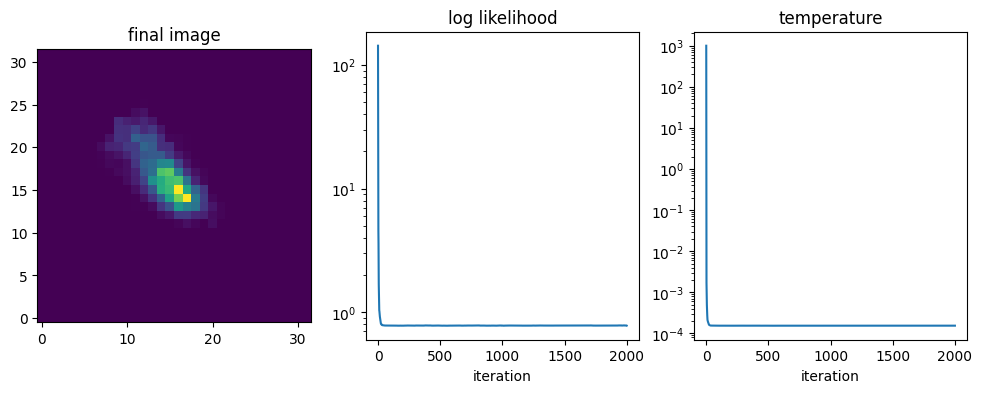

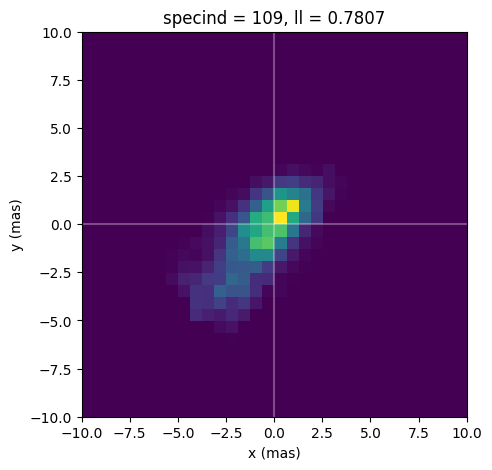

1024it [00:23, 43.11it/s]
100%|██████████| 2000/2000 [00:13<00:00, 150.12it/s]


Done


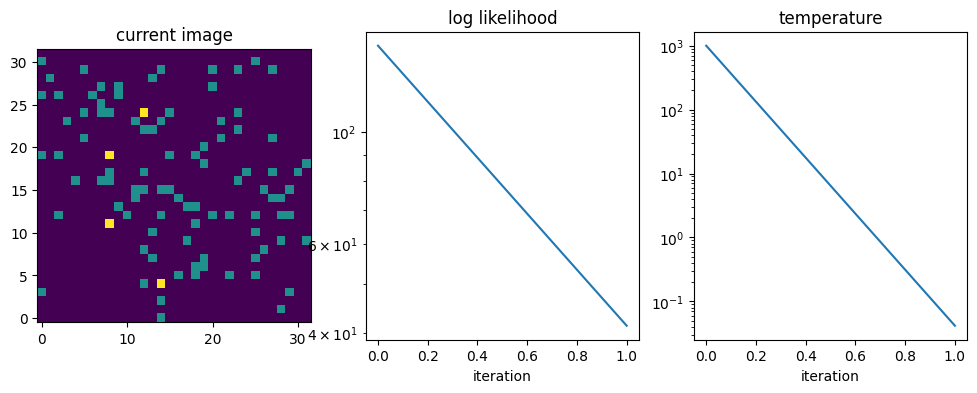

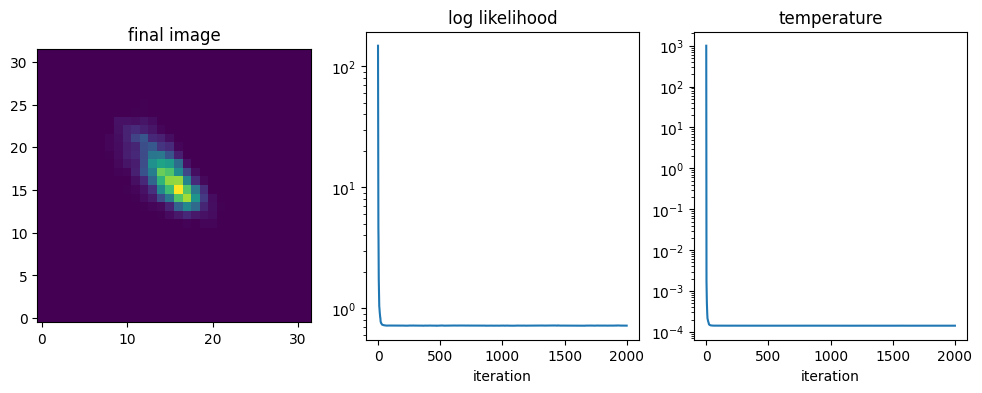

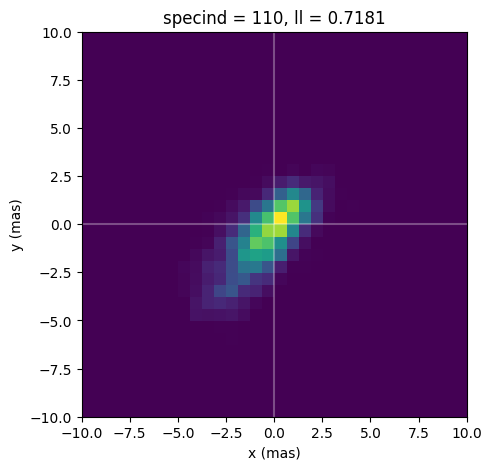

1024it [00:23, 42.88it/s]
100%|██████████| 2000/2000 [00:13<00:00, 149.23it/s]


Done


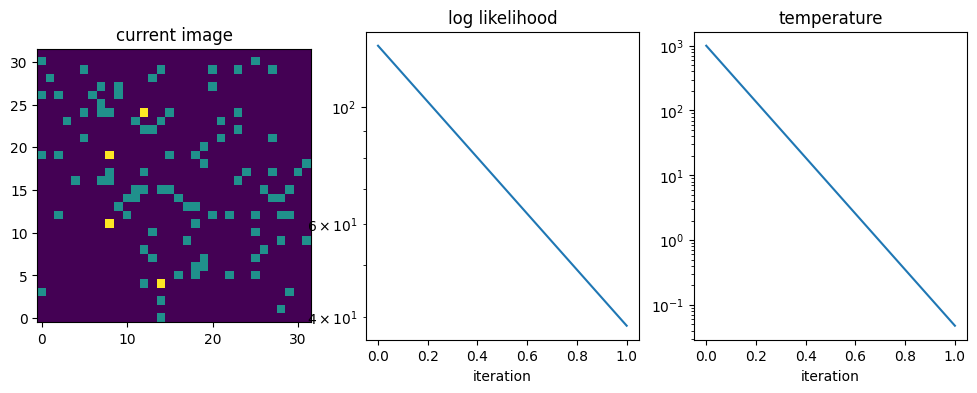

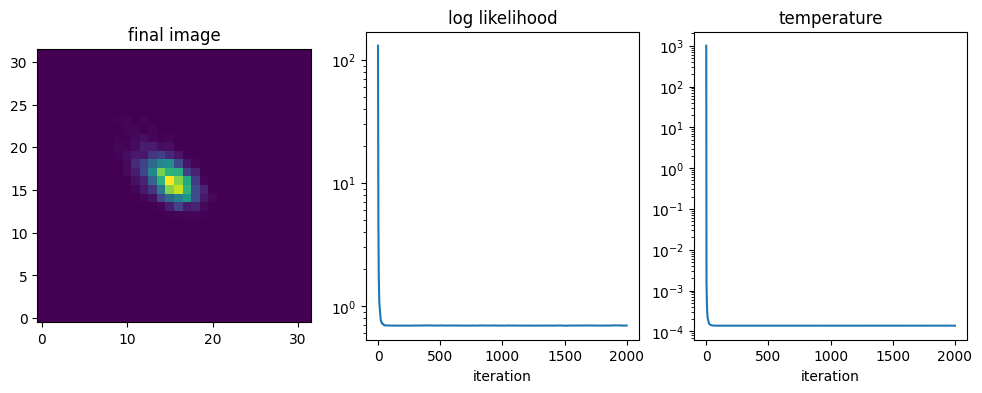

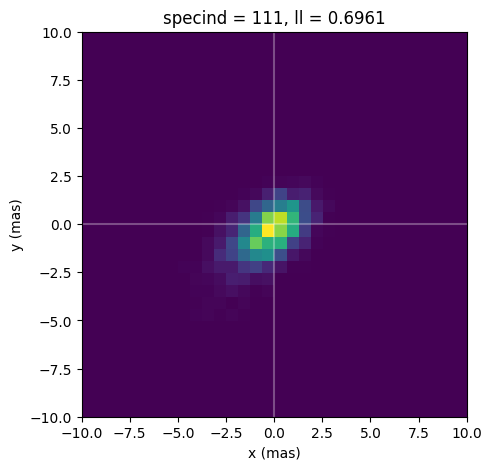

In [22]:

for specind in np.arange(103, 112):
    fibinds = np.arange(38)

    fitter.prepare_data(specind, fibinds)
    fitter.make_matrix(specind, fibinds)
    
    rc = fitter.run(niter = 2000, radius = 10, plot_every = 5000)

    fig = plt.figure(figsize=(5,5))
    plt.imshow(locs2image(rc.post_locs, rc.axis_len),
            extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
            origin='upper')
    plt.axvline(0, color='white', alpha=0.3)
    plt.axhline(0, color='white', alpha=0.3)
    plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
    plt.xlabel('x (mas)')
    plt.ylabel('y (mas)')

    fig.savefig('results/specind_%d.png' % specind)
    plt.show()
    
    np.save('results/specind_%d.npy' % specind, locs2image(rc.post_locs, rc.axis_len))

1024it [00:23, 43.06it/s]
100%|██████████| 2000/2000 [00:13<00:00, 150.36it/s]


Done


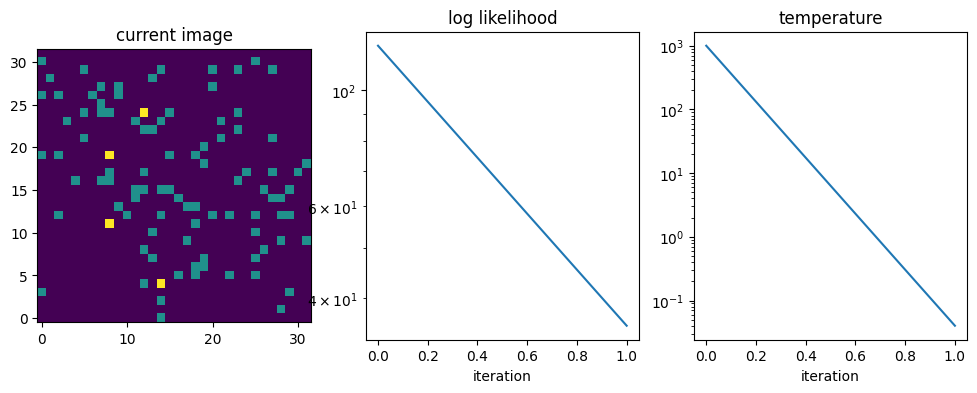

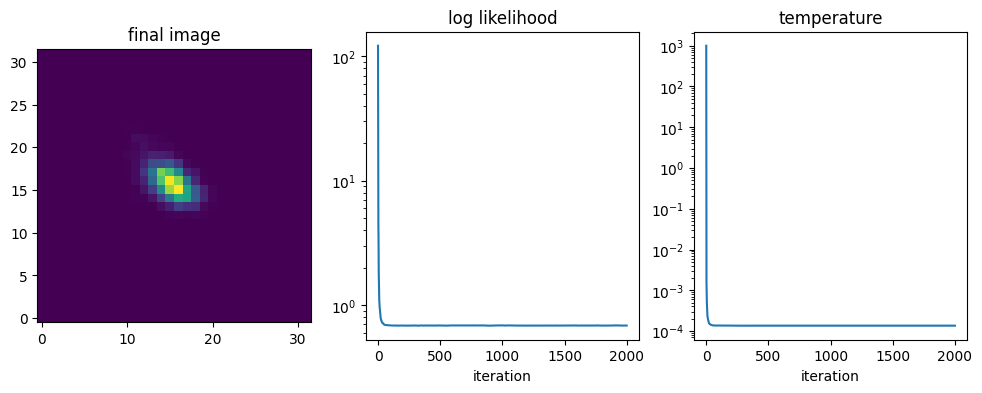

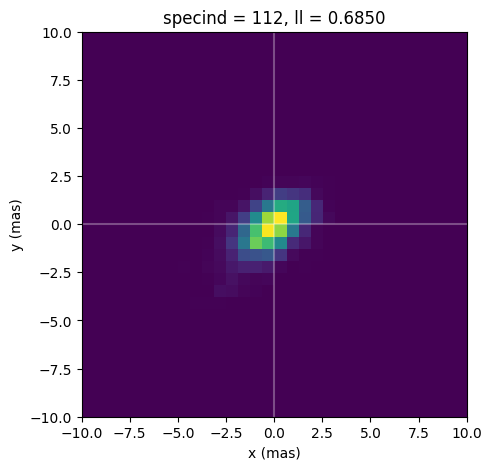

1024it [00:23, 43.03it/s]
100%|██████████| 2000/2000 [00:13<00:00, 152.00it/s]


Done


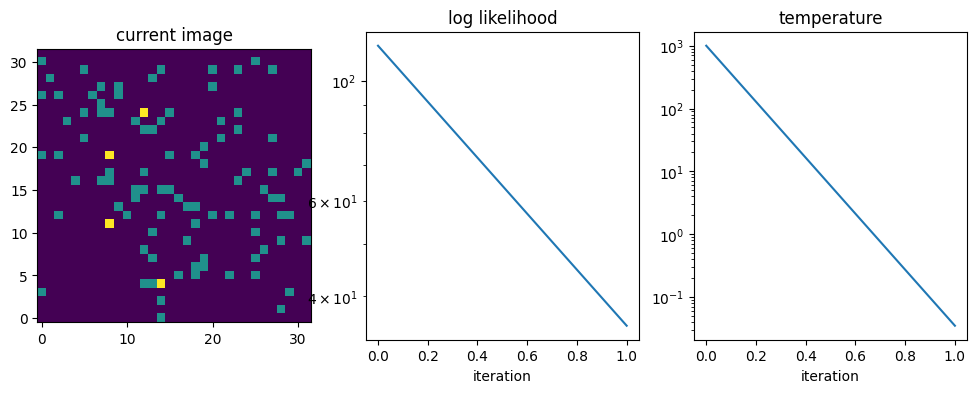

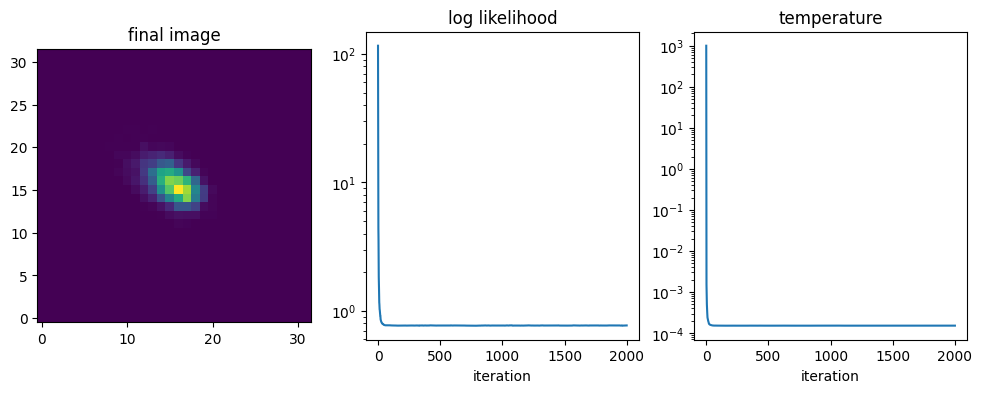

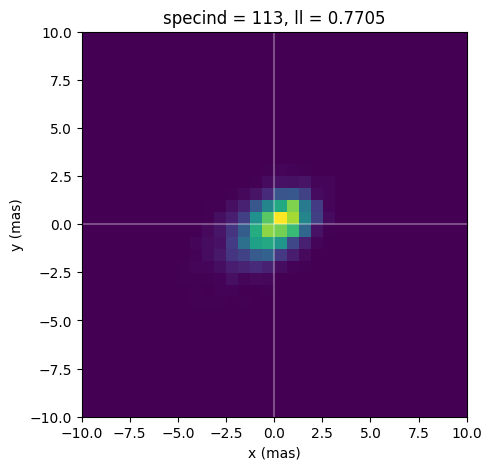

1024it [00:23, 43.23it/s]
100%|██████████| 2000/2000 [00:13<00:00, 146.89it/s]


Done


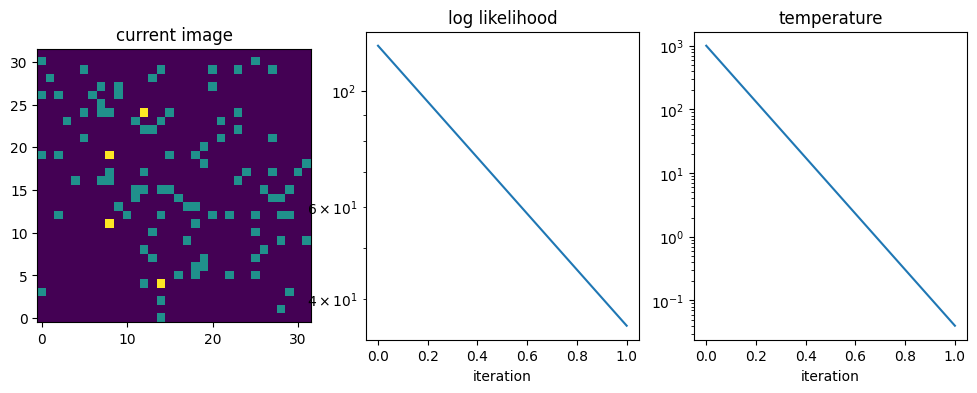

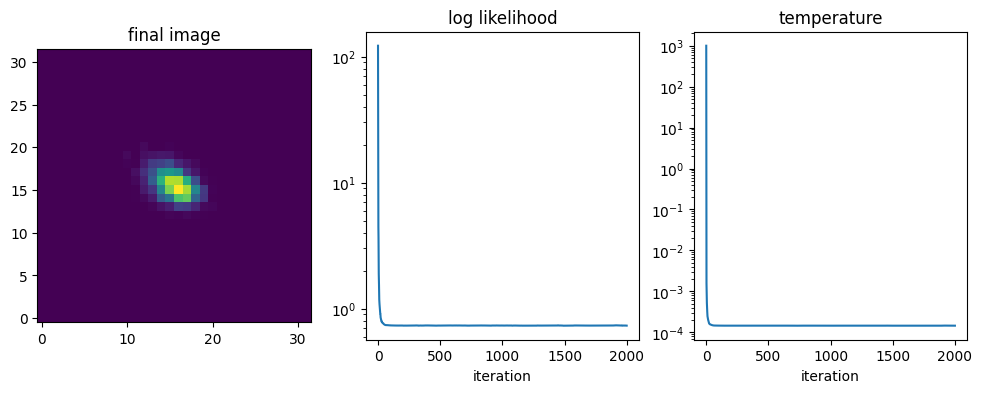

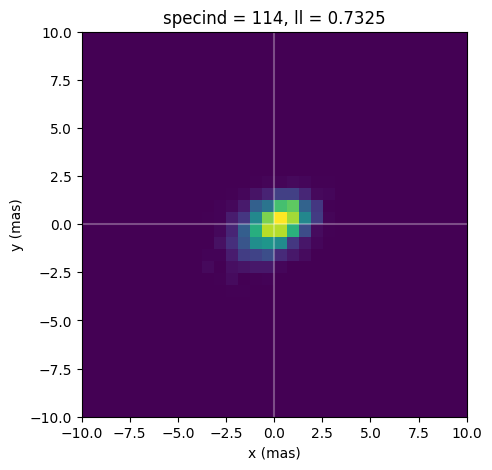

1024it [00:23, 43.16it/s]
100%|██████████| 2000/2000 [00:13<00:00, 149.64it/s]


Done


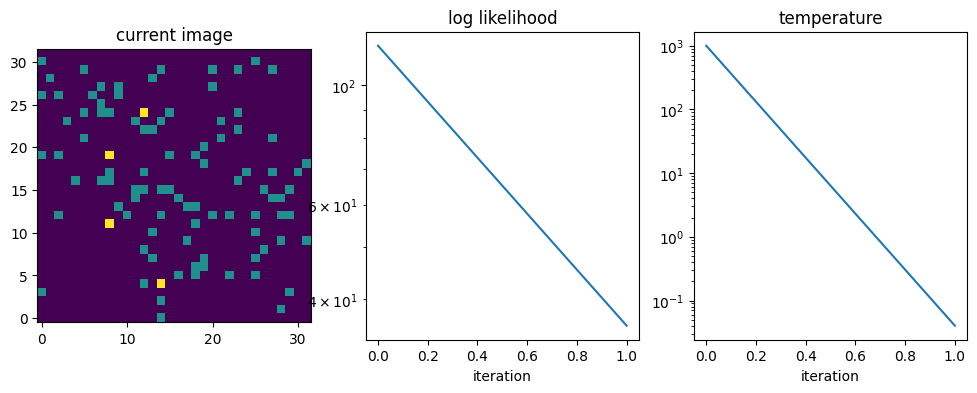

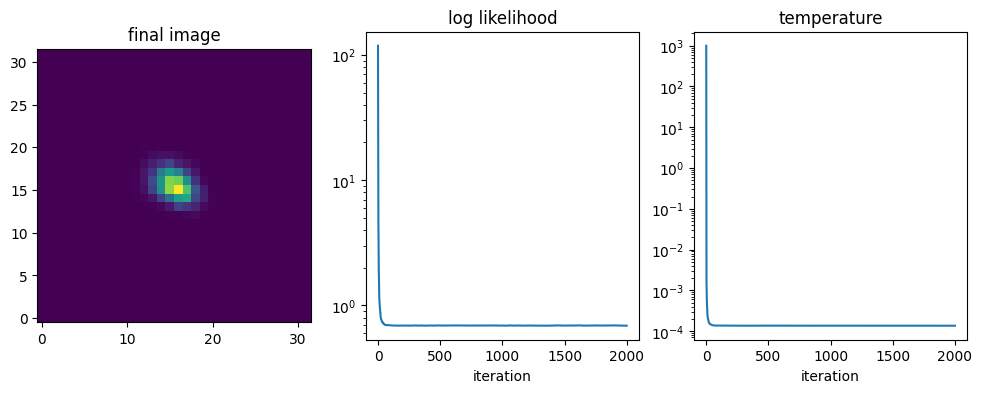

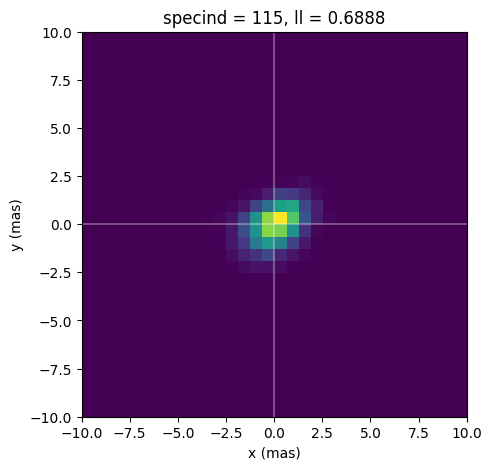

1024it [00:23, 43.23it/s]
100%|██████████| 2000/2000 [00:13<00:00, 150.48it/s]


Done


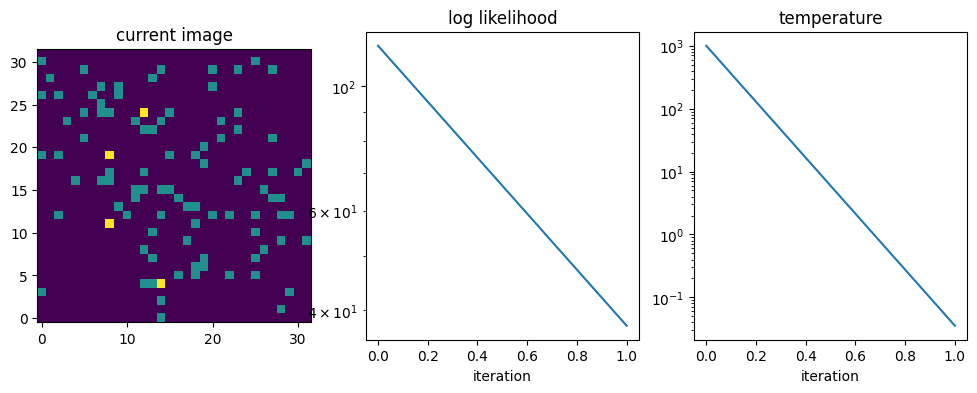

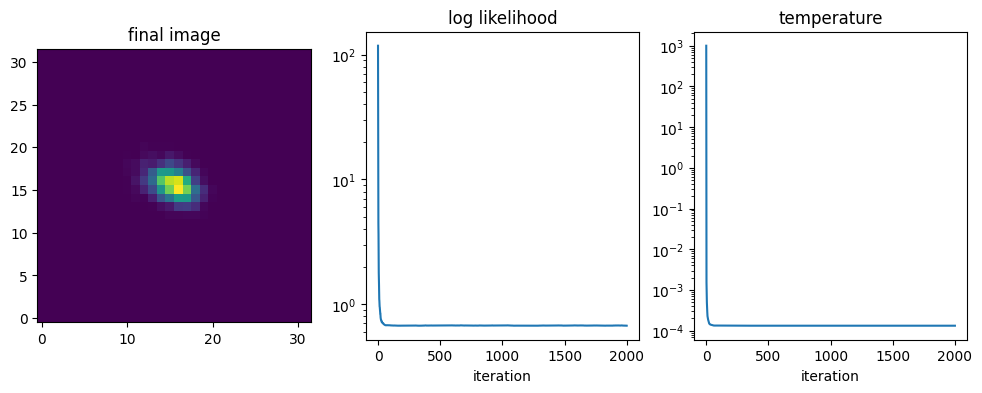

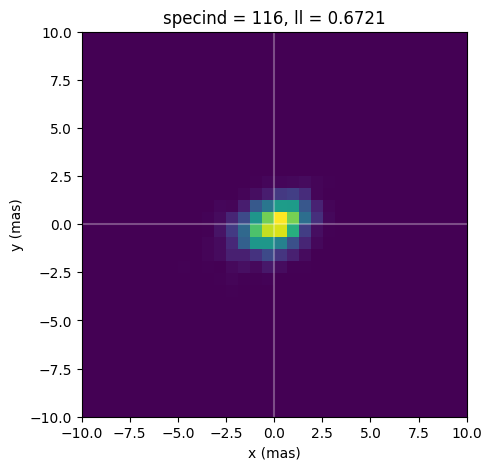

1024it [00:23, 43.20it/s]
100%|██████████| 2000/2000 [00:13<00:00, 150.76it/s]


Done


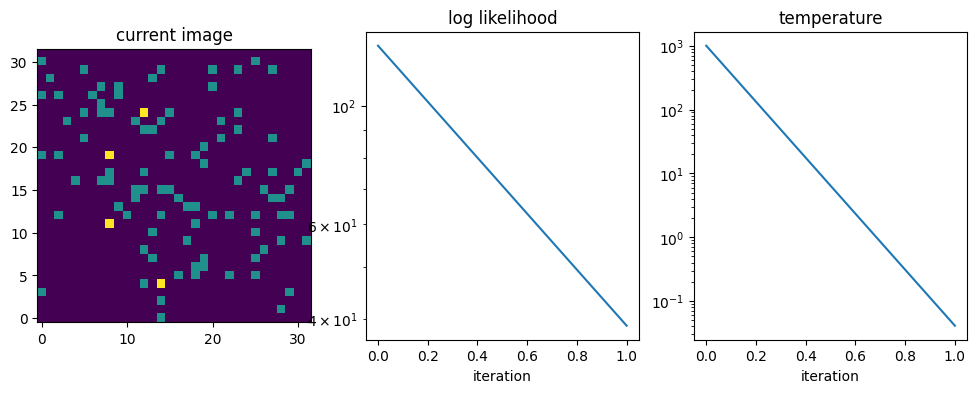

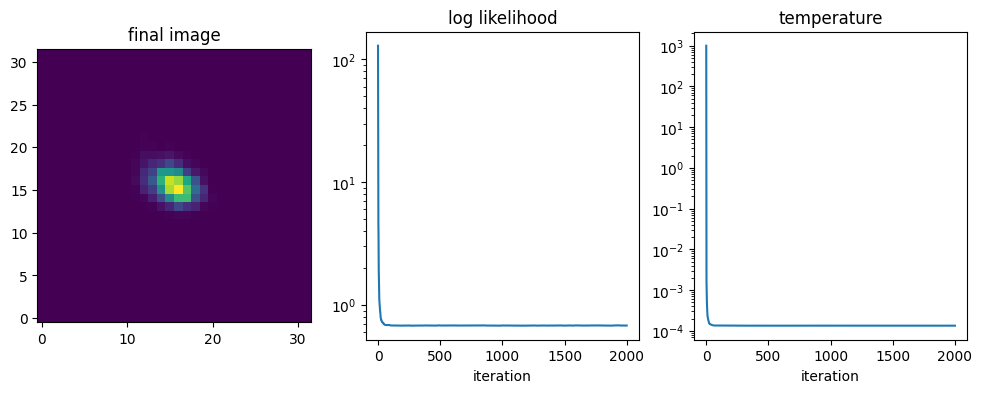

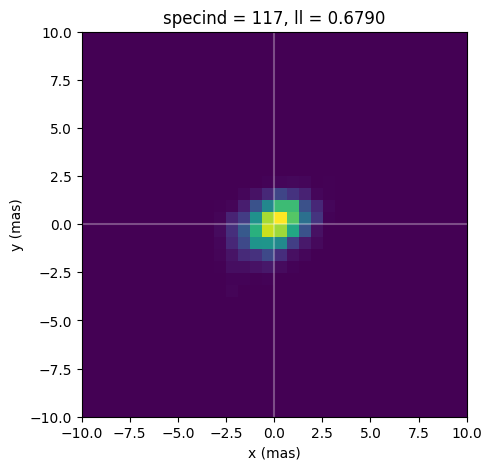

1024it [00:23, 42.97it/s]
100%|██████████| 2000/2000 [00:13<00:00, 151.52it/s]


Done


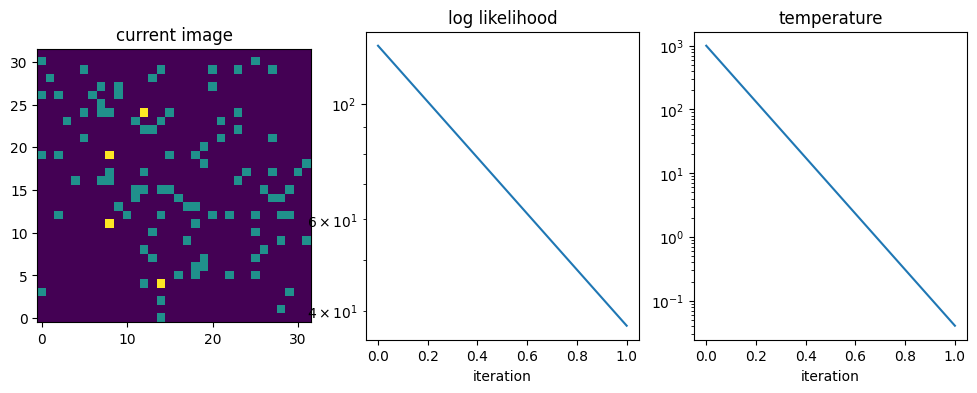

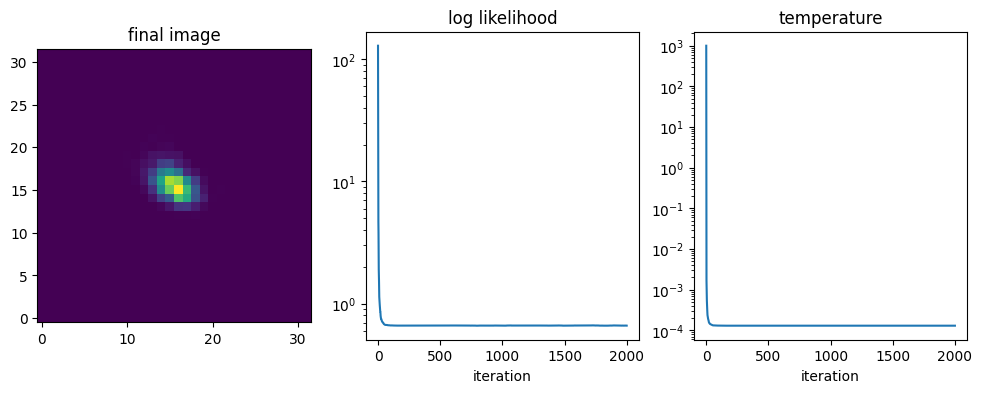

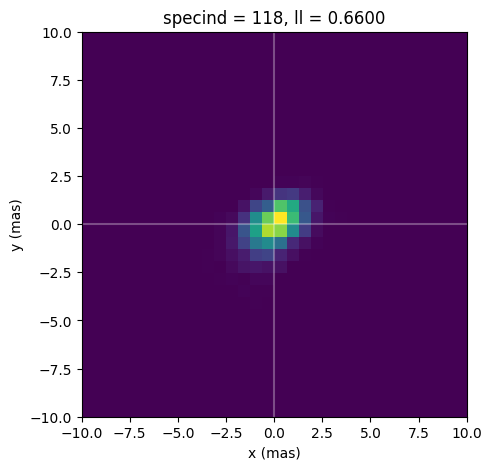

1024it [00:23, 43.19it/s]
100%|██████████| 2000/2000 [00:13<00:00, 142.92it/s]


Done


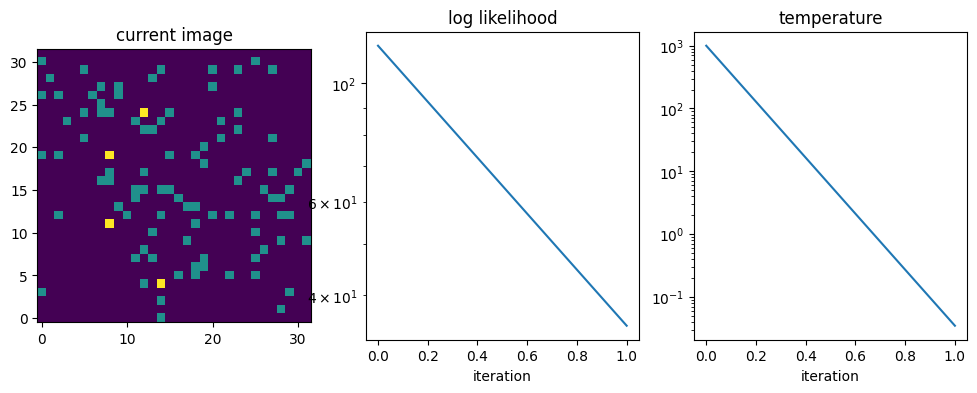

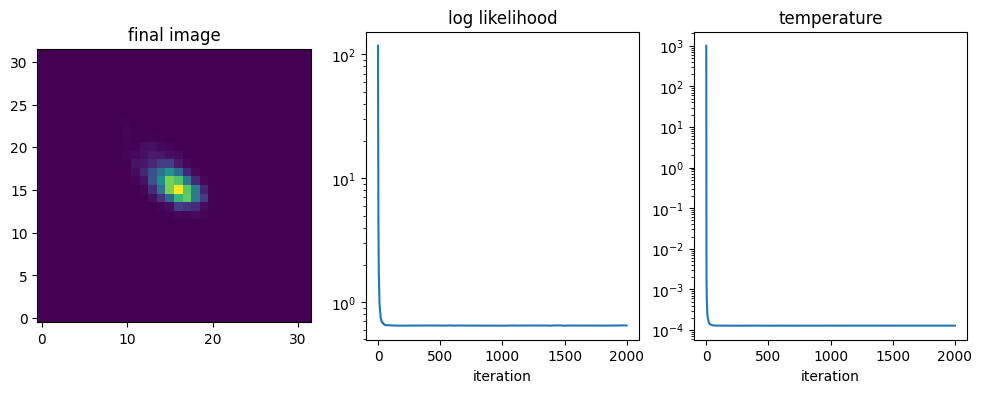

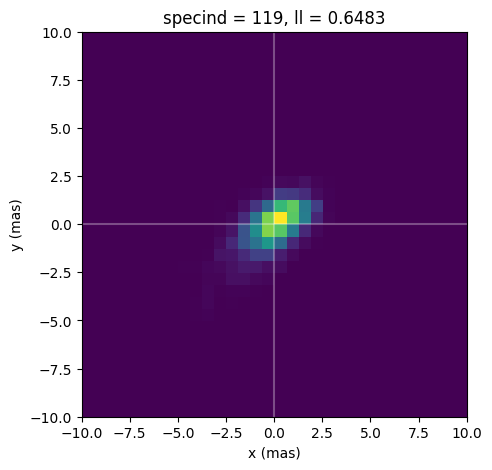

In [23]:

for specind in np.arange(112, 120):
    fibinds = np.arange(38)

    fitter.prepare_data(specind, fibinds)
    fitter.make_matrix(specind, fibinds)
    
    rc = fitter.run(niter = 2000, radius = 10, plot_every = 5000)

    fig = plt.figure(figsize=(5,5))
    plt.imshow(locs2image(rc.post_locs, rc.axis_len),
            extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
            origin='upper')
    plt.axvline(0, color='white', alpha=0.3)
    plt.axhline(0, color='white', alpha=0.3)
    plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
    plt.xlabel('x (mas)')
    plt.ylabel('y (mas)')

    fig.savefig('results/specind_%d.png' % specind)
    plt.show()
    
    np.save('results/specind_%d.npy' % specind, locs2image(rc.post_locs, rc.axis_len))

1024it [00:23, 43.10it/s]
100%|██████████| 2000/2000 [00:13<00:00, 147.12it/s]


Done


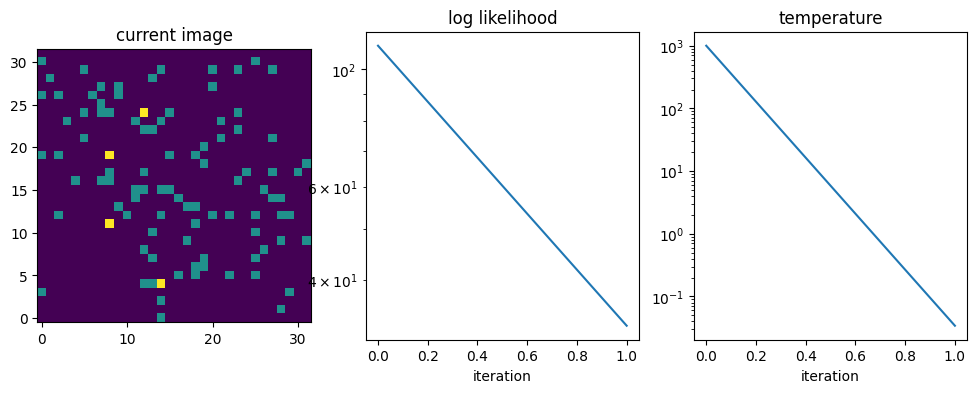

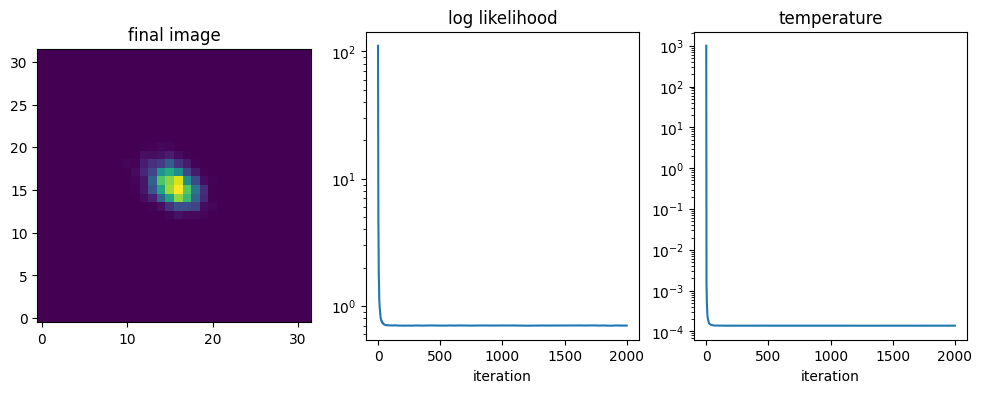

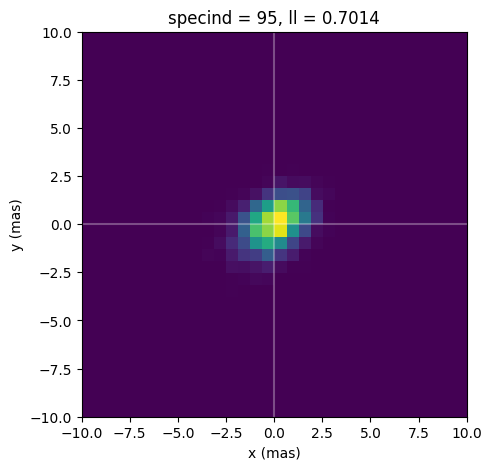

1024it [00:23, 43.32it/s]
100%|██████████| 2000/2000 [00:13<00:00, 150.13it/s]


Done


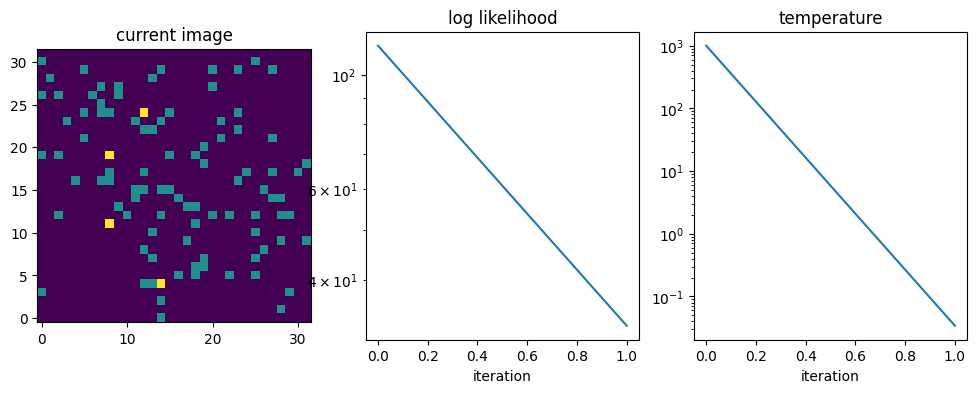

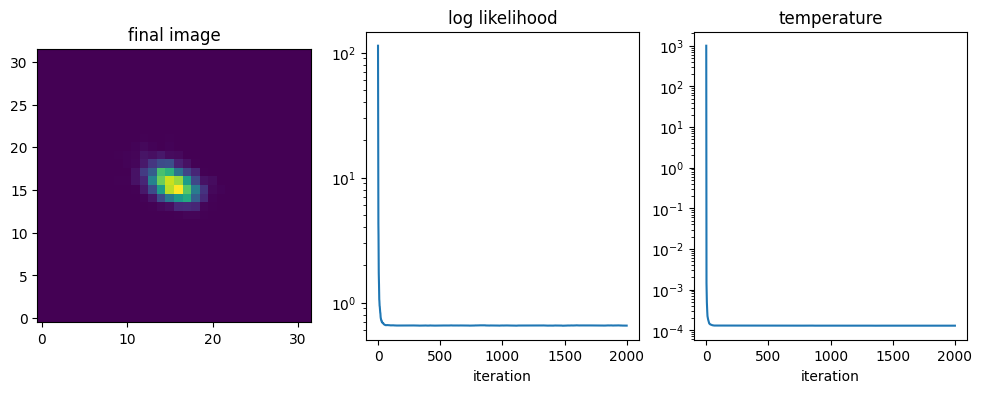

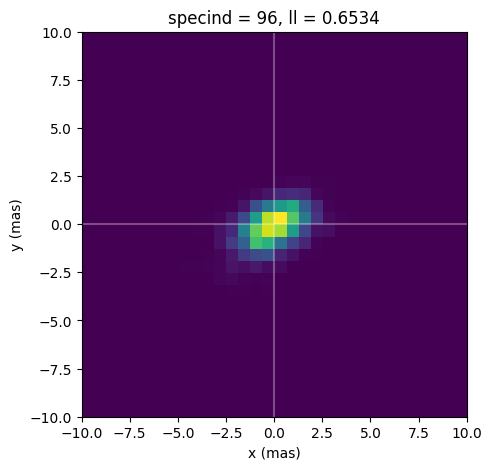

1024it [00:23, 42.85it/s]
100%|██████████| 2000/2000 [00:14<00:00, 142.70it/s]


Done


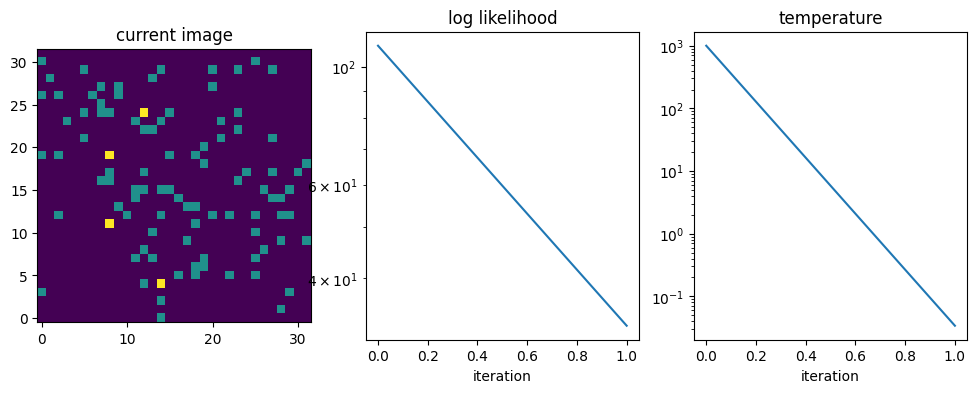

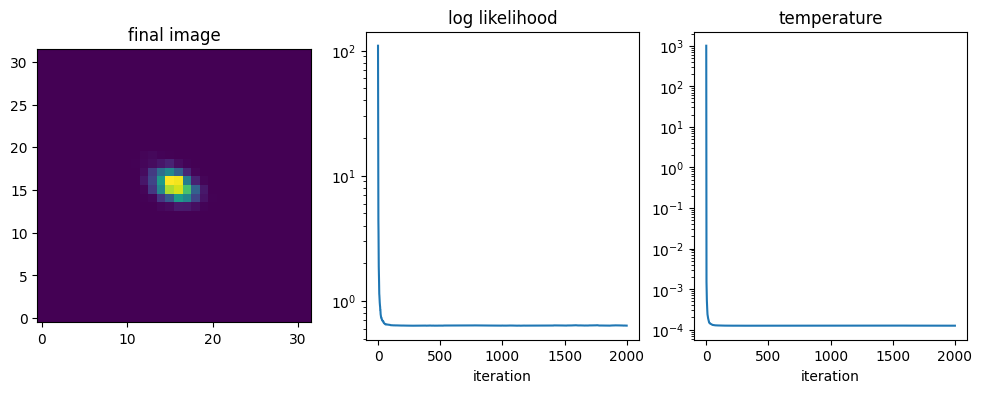

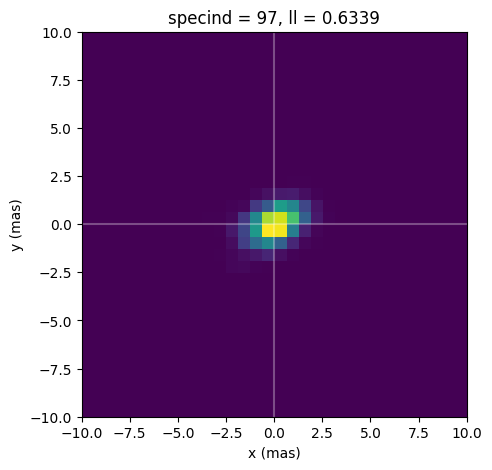

1024it [00:23, 43.08it/s]
100%|██████████| 2000/2000 [00:13<00:00, 147.09it/s]


Done


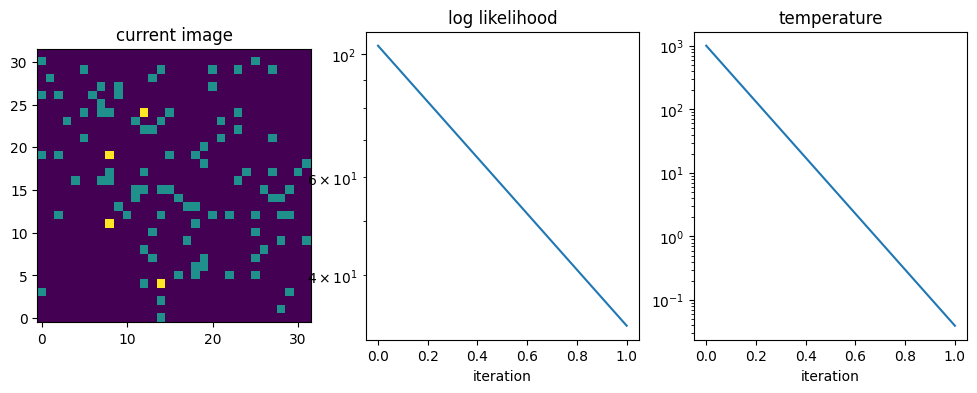

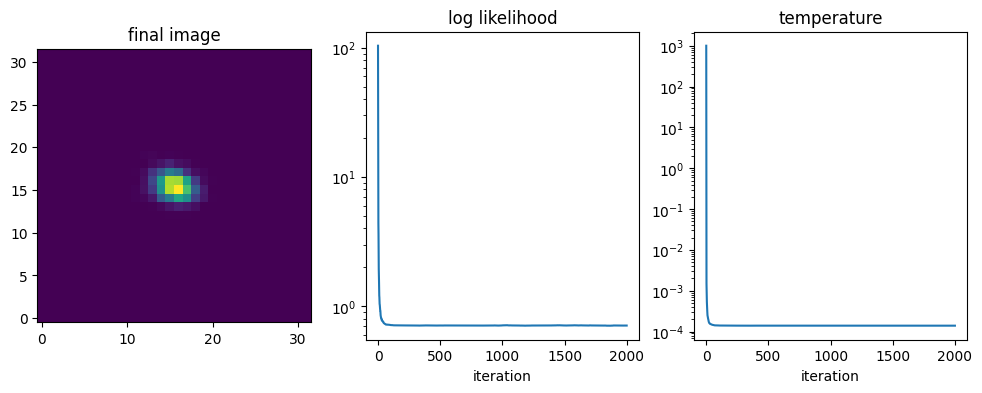

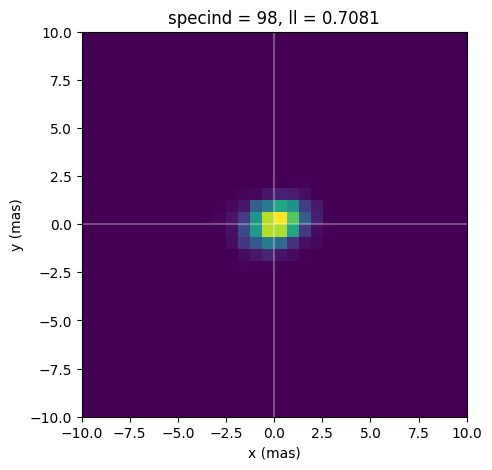

1024it [00:23, 43.15it/s]
100%|██████████| 2000/2000 [00:13<00:00, 149.95it/s]


Done


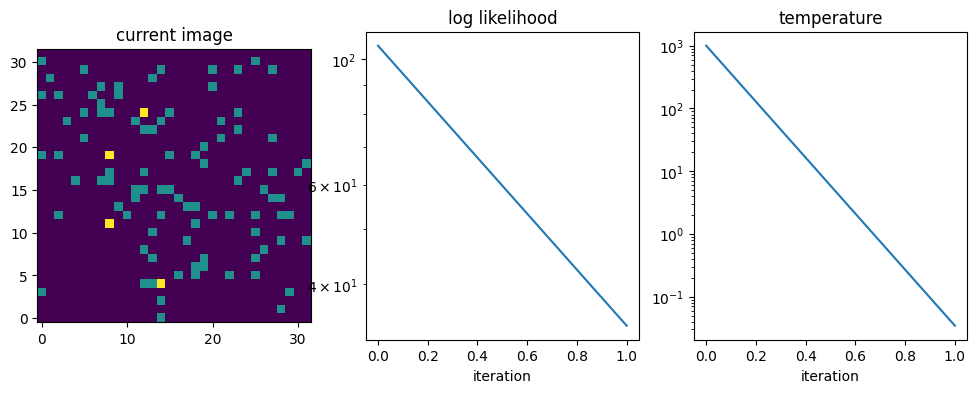

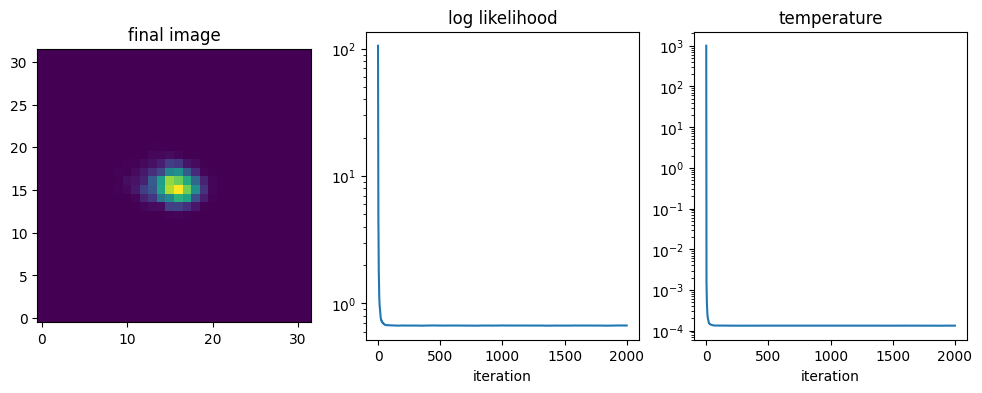

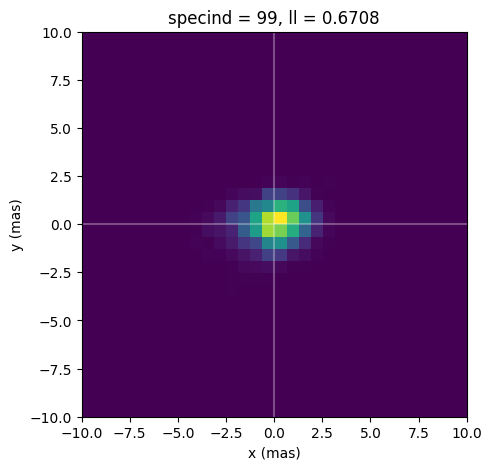

1024it [00:23, 42.91it/s]
100%|██████████| 2000/2000 [00:13<00:00, 143.31it/s]


Done


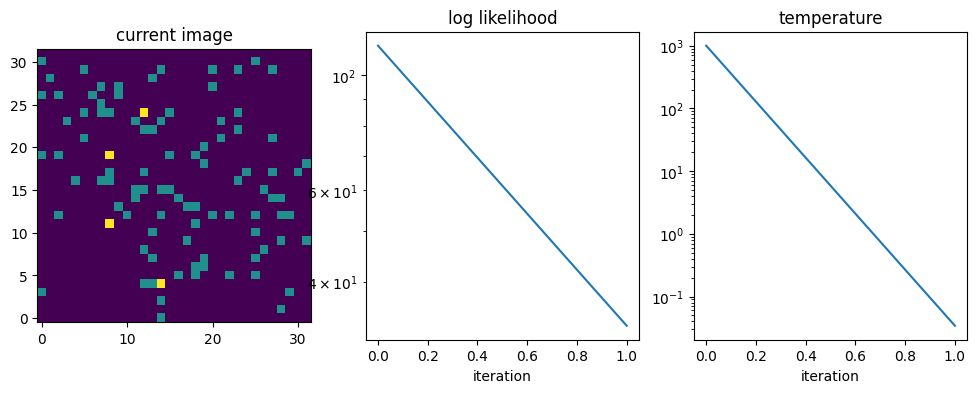

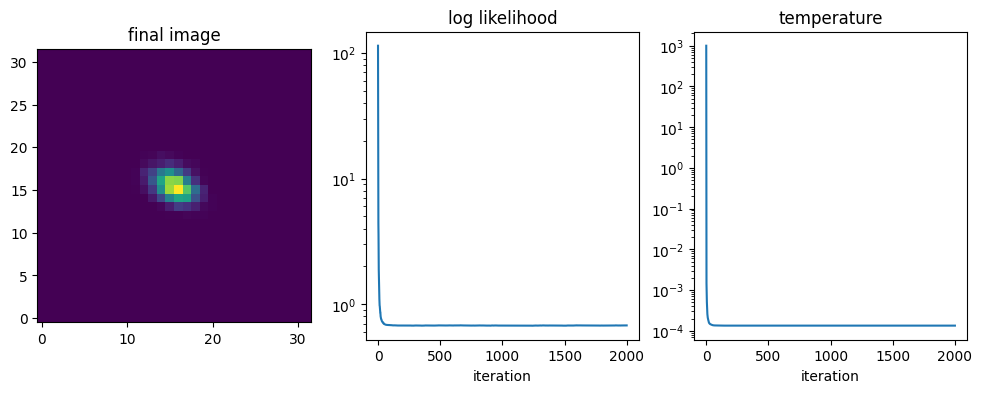

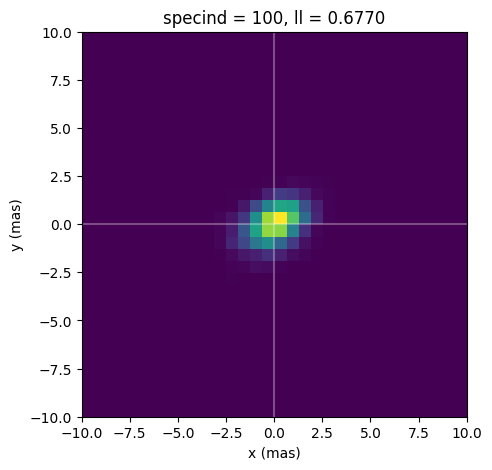

1024it [00:23, 43.14it/s]
100%|██████████| 2000/2000 [00:13<00:00, 148.43it/s]


Done


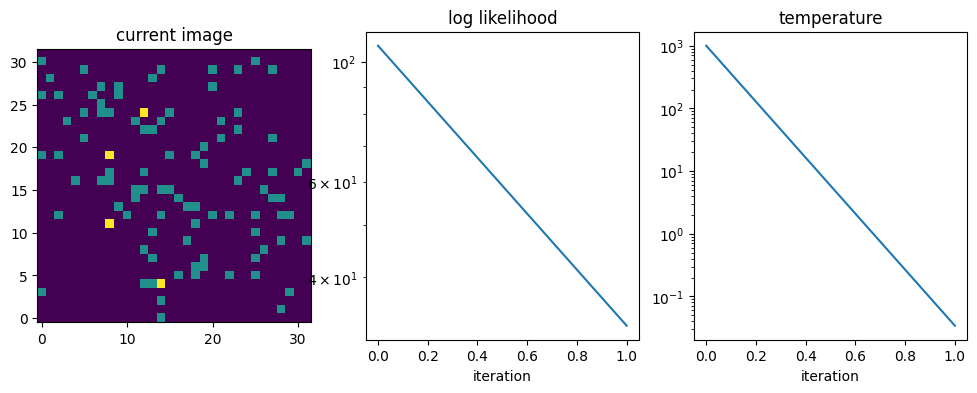

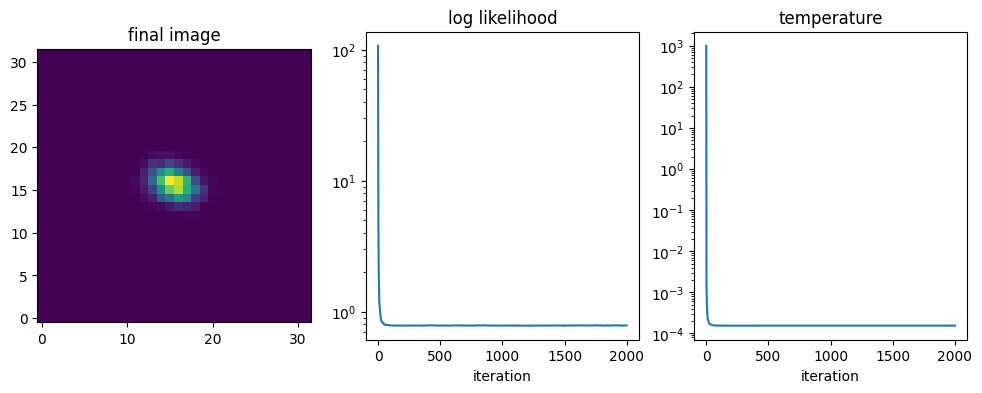

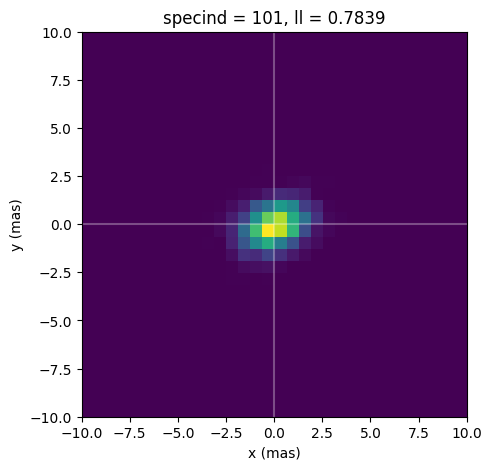

1024it [00:23, 43.30it/s]
100%|██████████| 2000/2000 [00:13<00:00, 149.96it/s]


Done


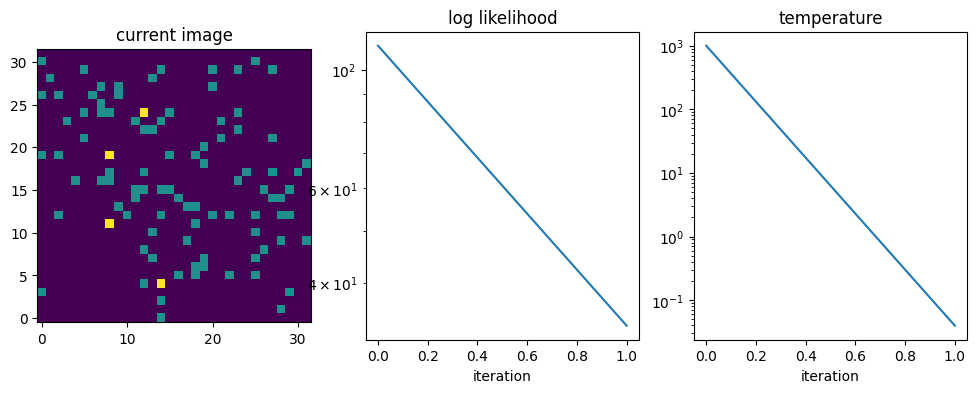

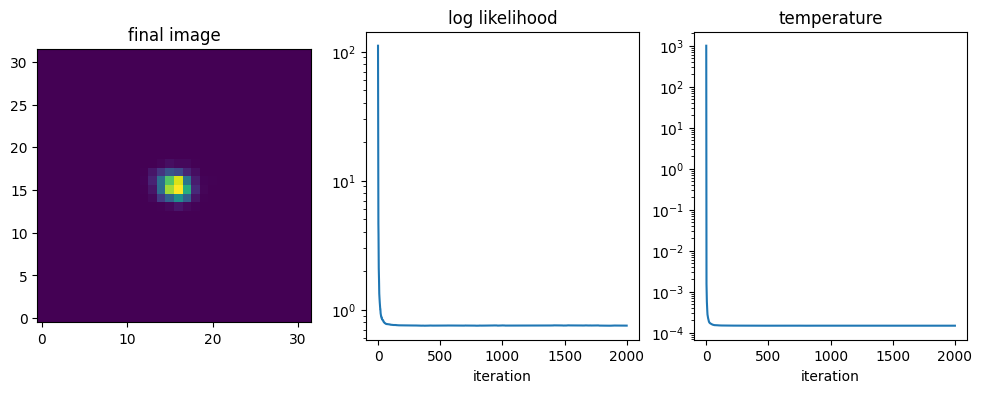

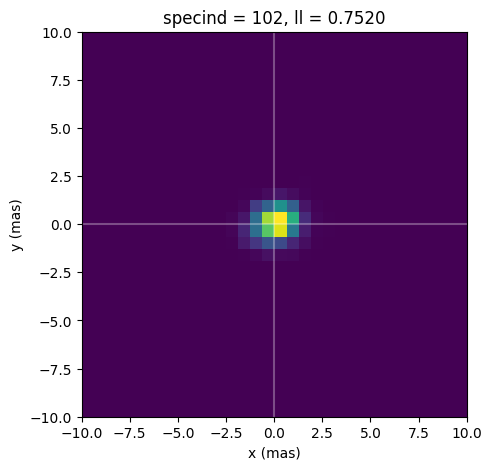

In [24]:

for specind in np.arange(95, 103):
    fibinds = np.arange(38)

    fitter.prepare_data(specind, fibinds)
    fitter.make_matrix(specind, fibinds)
    
    rc = fitter.run(niter = 2000, radius = 10, plot_every = 5000)

    fig = plt.figure(figsize=(5,5))
    plt.imshow(locs2image(rc.post_locs, rc.axis_len),
            extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
            origin='upper')
    plt.axvline(0, color='white', alpha=0.3)
    plt.axhline(0, color='white', alpha=0.3)
    plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
    plt.xlabel('x (mas)')
    plt.ylabel('y (mas)')

    fig.savefig('results/specind_%d.png' % specind)
    plt.show()
    
    np.save('results/specind_%d.npy' % specind, locs2image(rc.post_locs, rc.axis_len))

In [8]:
rc.current_ll

np.float64(0.698873559010997)

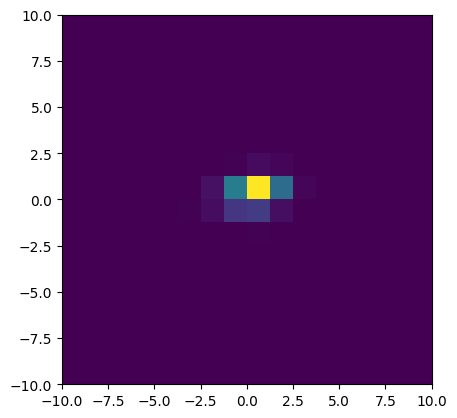

In [ ]:
rc.final_vec